**导入依赖项和预训练模型**

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

**预处理图像和加载**

In [ ]:
#定义图像路径在同一个文件夹
def load_image(img_path):
    #用tensorflow中的io来读取文档
    img = tf.io.read_file(img_path)
    #重新写这个图像，通过三个通道
    img = tf.image.decode_image(img, channels=3)
    #转换这个图像的熟悉，是float32
    img = tf.image.convert_image_dtype(img, tf.float32)
    #将这个图像放新的array，：表示放入整个图像
    img = img[tf.newaxis, :]
    return img

In [ ]:
content_image = load_image('abc1.jpg')
style_image = load_image('abc2.jpg')

**图像输出**

In [ ]:
content_image.shape

TensorShape([1, 200, 200, 3])

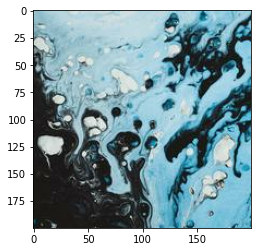

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

**风格化图像**

In [ ]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

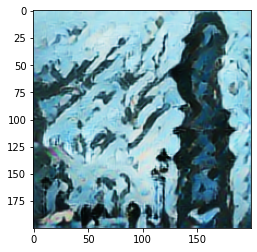

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
#转换RGB颜色，乘以255的颜色数值
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True